<a href="https://colab.research.google.com/github/zonezero2604/Hkr_Set/blob/master/B%C3%A0i_11_Ph%C3%A2n_lo%E1%BA%A1i_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phân loại cơ bản: Dự đoán ảnh quần áo giày dép


Khi bạn muốn liên kết Google Drive, bạn có thể làm như sau:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Trong hướng dẫn này, chúng ta sẽ huấn luyện một mô hình mạng neuron để phân loại các hình ảnh về quần áo và giày dép.

Đừng ngại nếu bạn không hiểu hết mọi chi tiết, vì chương trình trong hướng dẫn này là một chương trình TensorFlow hoàn chỉnh, và các chi tiết sẽ dần được giải thích ở những phần sau.

Hướng dẫn này dùng [tf.keras](https://www.tensorflow.org/guide/keras), một API cấp cao để xây dựng và huấn luyện các mô hình trong TensorFlow.


In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


Chúng ta sẽ dùng tập dữ liệu về quần áo và giày dép từ [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist), chứa khoảng 70,000 ảnh đen trắng phân thành 10 loại. Mỗi một ảnh là một loại quần áo hoặc giày dép với độ phân giải thấp (28 by 28 pixel), như hình minh hoạ bên dưới:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST là tập dữ liệu được dùng để thay thế cho tập dữ liệu [MNIST](http://yann.lecun.com/exdb/mnist/) kinh điển thường dùng cho các chương trình "Hello, World" của machine learning trong lĩnh vực thị giác máy tính. Tập dữ liệu kinh điển vừa đề cập gồm  ảnh của các con số (ví dụ 0, 1, 2) được viết tay. Các ảnh này có cùng định dạng tệp và độ phân giải với các ảnh về quần áo và giầy dép chúng ta sắp dùng.

Hướng dẫn này sử dụng tập dữ liệu Fashion MNIST, vì đây là một bài toán tương đối phức tạp hơn so với bài toán nhận diện chữ số viết tay. Cả 2 tập dữ liệu (Fashion MNIST và MNIST kinh điển) đều tương đối nhỏ và thường dùng để đảm bảo một giải thuật chạy đúng, phù hợp cho việc kiểm thử và debug.

Với tập dữ liệu này, 60.000 ảnh sẽ được dùng để huấn luyện và 10.000 ảnh sẽ đường dùng để đánh giá khả năng phân loại nhận diện ảnh của mạng neuron. Chúng ta có dùng tập dữ liệu Fashion MNIST trực tiếp từ TensorFlow như sau:


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# fashion_mnist.load_data()
# trong này có 2 tuple trong mỗi tuple có 2 phần tử (train_images, train_labels), (test_images, test_labels)

# train_images[0] : 1 tấm ảnh có 28 cột
#                   1 cột có 28 ô
#                   1 ô có 1 pixel
# train_labels[0] : 9 : ủng
# train_images[0] - train_labels[0] : 2 cái này tương ứng với nhau vd ảnh như nhất là chiếc ủng

Tập dữ liệu sau khi được tải sẽ trả về 4 mảng NumPy:

* 2 mảng `train_images` và `train_labels` là *tập huấn luyện*. Mô hình sẽ học từ dữ liệu của 2 mảng này.
* 2 mảng `test_images` vả `test_labels` là *tập kiểm thử*. Sau khi mô hình được huấn luyện xong, chúng ta sẽ chạy thử mô hình với dữ liệu đầu vào từ `test_images` để lấy kết quả, và so sánh kết quả đó với dữ liệu đối ứng từ `test_labels` để đánh giá chất lượng của mạng neuron.

Mỗi ảnh là một mảng NumPy 2 chiều, 28x28, với mỗi pixel có giá trị từ 0 đến 255. *Nhãn* là một mảng của các số nguyên từ 0 đến 9, tương ứng với mỗi *lớp* quần áo giày dép:

<table>
  <tr>
    <th>Nhãn</th>
    <th>Lớp</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Áo thun</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Quần dài</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Áo liền quần</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Đầm</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Áo khoác</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Áo sơ mi</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Giày</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Túi xách</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ủng</td>
  </tr>
</table>

Mỗi ảnh sẽ được gán với một nhãn duy nhất. Vì tên của mỗi lớp không có trong tập dữ liệu, nên chúng ta có thể định nghĩa ở đây để dùng về sau:

In [ ]:
class_names = ['Áo thun', 'Quần dài', 'Áo liền quần', 'Đầm', 'Áo khoác',
               'Sandal', 'Áo sơ mi', 'Giày', 'Túi xách', 'Ủng']

## Khám phá dữ liệu

Chúng ta có thể khám phá dữ liệu một chút trước khi huấn luyện mô hình. Câu lệnh sau sẽ cho ta thấy có 60.000 ảnh trong tập huấn luyện, với mỗi ảnh được biểu diễn theo dạng 28x28 pixel:

In [ ]:
train_images.shape # (60000, 28, 28)

(60000, 28, 28)

Tương tự, tập huấn luyện cũng có 60.000 nhãn đối ứng:

In [ ]:
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [ ]:
len(train_labels) # 60000

60000

Mỗi nhãn là một số nguyên từ 0 đến 9:

In [ ]:
train_labels # array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Có 10.000 ảnh trong tập kiểm thử, mỗi ảnh cũng được biểu diễn ở dạng 28 x 28 pixel:





In [ ]:
test_images.shape

(10000, 28, 28)

Và tập kiểm thử cũng chứa 10,000 nhãn:

In [ ]:
len(test_labels)

10000


## Tiền xử lý dữ liệu

Dữ liệu cần được tiền xử lý trước khi được dùng để huấn luyện mạng neuron. Phân tích ảnh đầu tiên trong tập dữ liệu, chúng ta sẽ thấy các pixel có giá trị từ 0 đến 255:

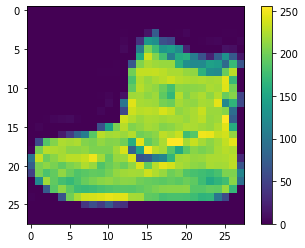

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Chúng ta cần tiền xử lý để mỗi một điểm ảnh có giá trị từ 0 đến 1 (có thể hiểu là 0% đến 100%). Để làm điều này, chúng ta chỉ cần lấy giá trị của pixel chia cho 255. Cần lưu ý rằng việc tiền xử lý này phải được áp dụng đồng thời cho cả *tập huấn luyện* và *tập kiểm thử*:

In [ ]:
# normalization =>  0-1
train_images = train_images / 255.0

test_images = test_images / 255.0

Để chắc chắn việc tiền xử lý diễn ra chính xác, chúng ta có thể in ra 25 ảnh đầu trong *tập huấn luyện* cùng với tên lớp dưới mỗi ảnh.

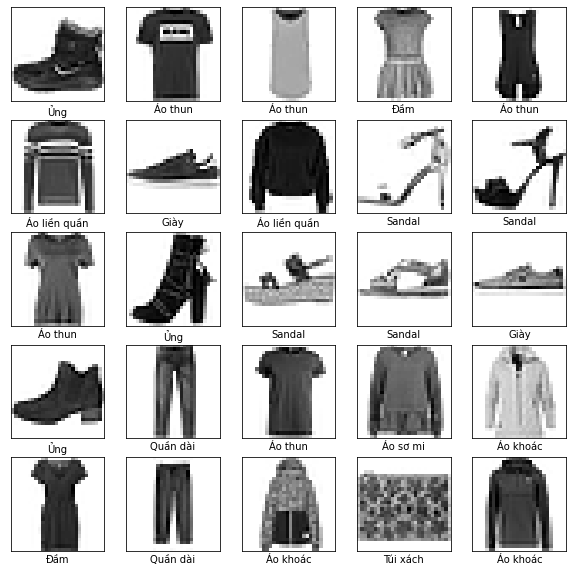

In [ ]:
plt.figure(figsize=(10,10)) # Cái ảnh size 10,10
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])          # làm mất độ chia theo chiều x cho khỏi rối
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # using the a colormap. binary là trắng - đen
    plt.xlabel(class_names[train_labels[i]]) # Trong tập train mình đã biết chính xác Nhãn của từng input X
plt.show()  # vẽ tất cả các ảnh ở trên trong cùng một ảnh

## Xây dựng mô hình

Để xây dựng mạng neuron, chúng tay cần cấu hình các layer của mô hình, và sau đó biên dịch mô hình.


### Thiết lập các layers

Thành phần cơ bản của một mạng neuron là các *layer*. Các layer trích xuất các điểm đặc biệt từ dữ liệu mà chúng đón nhận. Khi thực hiện tốt, những điểm đặc biệt này mang nhiều ý nghĩa và phục vụ cho toán của chúng ta.

Đa số các mô hình deep learning đều chứa các layer đơn gian được xâu chuỗi lại với nhau. Đa số các layer, ví dụ `tf.keras.layers.Dense`, đều có các trọng số sẽ được học trong quá trình huấn luyện.


In [ ]:
# Tạo một model neural 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   # Kéo dãn tấm ảnh 2D thành 1 D Lớp input gồm 764 nút
    keras.layers.Dense(128, activation='relu'),   # Lớp hidđen gồm 128 lớp ẩn
    keras.layers.Dense(10, activation='softmax')
]) #Sequential một chuỗi chứa 3 lớp 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Trong mạng neuron trên, lớp đầu tiên, `tf.keras.layers.Flatten`, chuyển đổi định dạng của hình ảnh từ mảng hai chiều (28x28) thành mảng một chiều (28x28 = 784). Tưởng tương công việc của layer này là cắt từng dòng của anh, và ghép nối lại thành một dòng duy nhất nhưng dài gấp 28 lần. Lớp này không có trọng số để học, nó chỉ định dạng lại dữ liệu.

Sau layer làm phẳng ảnh (từ 2 chiều thành 1 chiều), phần mạng neuron còn lại gồm một chuỗi hai layer `tf.keras.layers.Dense`. Đây là các layer neuron được kết nối hoàn toàn (mỗi một neuron của layer này kết nối đến tất cả các neuron của lớp trước và sau nó). Layer `Dense` đầu tiên có 128 nút (hoặc neuron). Layer thứ hai (và cuối cùng) là lớp *softmax* có 10 nút, với mỗi nút tương đương với điểm xác suất, và tổng các giá trị của 10 nút này là 1 (tương đương 100%). Mỗi nút chứa một giá trị cho biết xác suất hình ảnh hiện tại thuộc về một trong 10 lớp.

### Biên dịch mô hình

Trước khi mô hình có thể được huấn luyện, chúng ta cần thêm vài chỉnh sửa. Các chỉnh sửa này được thêm vào trong bước *biên dịch* của mô hình:

* *Hàm mất mát* — dùng để đo lường mức độ chính xác của mô hình trong quá trình huấn luyện. Chúng ta cần giảm thiểu giá trị của hạm này "điều khiển" mô hình đi đúng hướng (thiệt hại càng ít, chính xác càng cao).
* *Trình tối ưu hoá* — Đây là cách mô hình được cập nhật dựa trên dữ liệu huấn luyện được cung cấp và hàm thiệt hại.
* *Số liệu* — dùng để theo dõi các bước huấn luyện và kiểm thử. Ví dụ sau dùng *accuracy*, tỉ lệ ảnh được phân loại chính xác.


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Huấn luyện mô hình

Huấn luyện mô hình mạng neuron cần các bước sau:

1. Cung cấp dữ liệu huấn luyện cho mô hình. Trong ví dụ này, dữ liệu huấn luyện năm trong 2 mảng `train_images` và `train_labels`
2. Mô hình sẽ học cách liên kết ảnh với nhãn.
3. Chúng ta sẽ yêu cầu mô hình đưa ra dự đoán từ dữ liệu của tập kiểm thử, trong ví dụ này là mảng `test_images`, sau đó lấy kết quả dự đoán đối chiếu với nhãn trong mảng `test_labels`.

Để bắt đầu huấn luyện, gọi hàm `model.fit`. Hàm này được đặt tên `fit` vì nó sẽ "fit" ("khớp") mô hình với dữ liệu huấn luyện:


In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6297 - accuracy: 0.7829
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3810 - accuracy: 0.8628
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3388 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3099 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2745 - accuracy: 0.8983
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2653 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2570 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2449 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.233

Trong quá trình huấn luyện, các số liệu như Loss-mất mát và hay độ chính xác được hiển thị. Với dữ liệu huấn luyện này, mô hình đạt đến độ accuracy vào khoảng 0.88 (88%).

In [ ]:
model.fit??

## Đánh giá mô hình

Tiếp theo, chúng đánh giá các chất lượng của mô hình bằng tập kiểm thử:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3685 - accuracy: 0.8778

Test accuracy: 0.8777999877929688


Đến thời điểm này, chúng ta thấy rằng độ accuracy của mô hình, khi đánh giá bằng tập kiểm thử, hơi thấp hơn so với số liệu trong quá trình huấn luyện. Khoảng cách giữa hai độ accuracy khi huấn luyện và khi kiểm thử thể hiện sự *overfitting*. Overfitting xảy ra khi một mô hình ML hoạt động kém hơn khi được cung cấp các đầu vào mới, mà mô hình chưa từng thấy trước đây trong quá trình đào tạo.

## Đưa ra dự đoán

Với một mô hình đã được đào tạo, chúng ta có thể dùng nó để đưa ra dự đoán với một số ảnh.

In [ ]:
predictions = model.predict(test_images)

Ở đây, mô hình sẽ dự đoán nhãn cho từng hình ảnh trong bộ thử nghiệm. Hãy xem dự đoán đầu tiên:

In [ ]:
predictions[0]

array([7.1188384e-09, 6.4798722e-09, 5.4913118e-10, 5.1024574e-15,
       3.5707253e-09, 2.1164719e-04, 8.4018553e-10, 6.5821328e-04,
       5.0455451e-10, 9.9913019e-01], dtype=float32)

Trong ví dụ này, dự đoán là một mảng 10 số thực, mỗi số tương ứng với "độ tự

tin" của mô hình rằng ảnh đó thuộc về nhãn đó. Chúng ta có thể thấy nhãn nào có độ tư tin cao nhất:

In [ ]:
np.argmax(predictions[0])

9

Vậy là mô hình tự tin nhất rằng ảnh này là một loại ủng, hoặc `class_names[9]`. Đối chiếu với nhãn trong tập kiểm thử, ta thấy dự đoán này là đúng:

In [ ]:
test_labels[0]

9

Ta thử vẽ biểu đồ để xem các dự đoán trên cả 10 lớp của mô hình.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Chúng ta có thể nhìn vào ảnh 0th, các dự đoán, và mảng dự đoán.
Nhãn dự đoán đúng màu xanh và nhãn sai màu đỏ. Con số là số phần trăm của các nhãn được dự đoán.

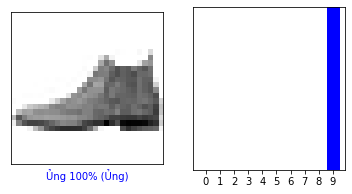

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Thử vẽ biểu đồ với vài ảnh và dự đoán đi kèm. Chú ý thấy rằng mô hình đôi khi dự đoán sai dù điểm tự tin rất cao.

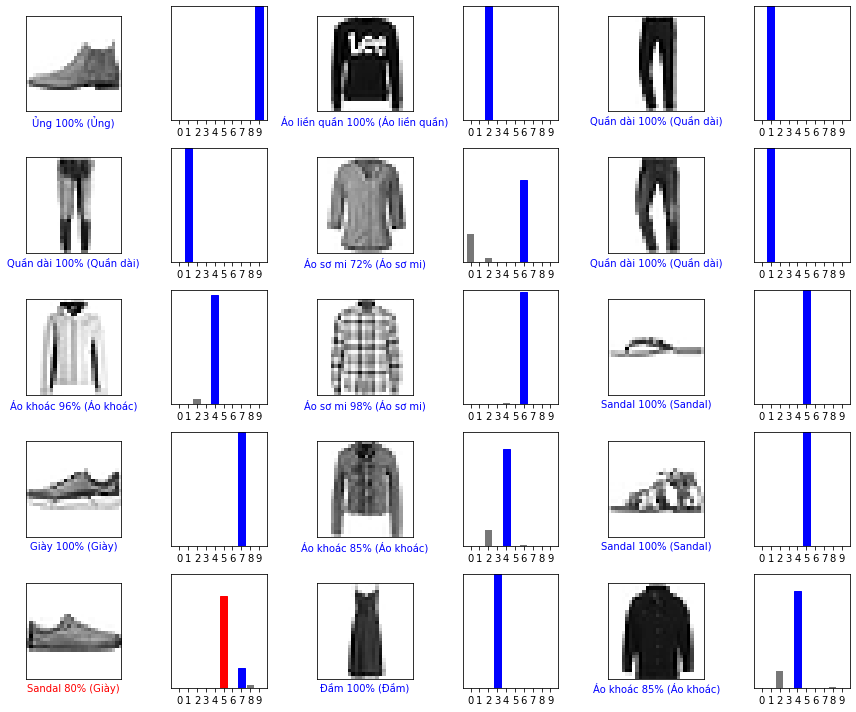

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Cuối cùng, dùng mô hình để đưa ra dự đoán về một ảnh duy nhất.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Các mô hình `tf.keras` được tối ưu hóa để đưa ra dự đoán về một *lô* hoặc bộ sưu tập các ví dụ cùng một lúc. Theo đó, mặc dù bạn đang sử dụng một ảnh duy nhất, bạn cần thêm nó vào list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Dự đoán nhãn cho ảnh này:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[8.1728003e-06 2.9720553e-14 9.9923801e-01 3.0057890e-09 2.5888096e-04
  3.1998802e-15 4.9490848e-04 1.3420954e-15 2.2580726e-10 6.6826746e-14]]


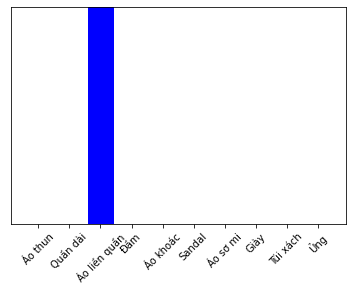

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` trả về một list của lists — mỗi list cho mỗi ảnh trong lô dữ liệu. Lấy dự đoán cho hình ảnh trong lô:

In [ ]:
np.argmax(predictions_single[0])

2